In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import gamma
%matplotlib inline

In [2]:
class MCMC:
    def __init__(self, v, n, o, a):
        self.v = v
        self.n = n
        self.o = o
        self.a = a
    #Scaled/shifted Student's t Distribution
    def pi_dist(self, x):
        term_1 = gamma((self.v + 1) / 2) / (gamma(self.v / 2) * np.sqrt(self.v * np.pi) * self.o)
        term_2 = (1 + ((1 / self.v) * ((x - self.n) / self.o)**2))**(-(self.v + 1) / 2)
        return term_1 * term_2
    #Proposal distribution
    def q_dist(self, x, y):
        term_1 = 1 / (math.sqrt(2 * math.pi) * self.a)
        term_2 = math.exp(-(y - x)**2 / (2 * self.a**2))
        return term_1 * term_2
    
    def run(self, times, default_state_x):
        x = np.zeros(times)
        x[0] = default_state_x
        acceptance_rate = 0
        for i in range(0, times-1):
            ######################################################################
            # I'M NOT SURE ABOUT THIS PART
            # I used these two values because i know that most of the values of de distribuiton 
            # are around -2 and 2, eventually with these parameters the data matches the CDF of the t distribution,
            # but also experimenting instead with 
            #y = np.random.uniform(x[i]-self.a,x[i]+self.a,1)[0]
            # also converges to the same result as 'self.a' is increased, it seems that
            # the initial state does not matter at all.
            y = np.random.uniform(x[i]-2,x[i]+2,1)[0]
            #####################################################################
            rand = np.random.rand()
            if rand < min(1, self.pi_dist(y)/self.pi_dist(x[i])):
                x[i+1] = y
                acceptance_rate = acceptance_rate + 1
            else:
                x[i+1] = x[i]
        return x, acceptance_rate / float(times)

In [3]:
nu = 3
mu = 1
sigma = 1

_(30 points)_ Run your code trying four different jump size scalings, $\alpha = 0.01, \alpha = 0.1, \alpha = 1$ and $\alpha = 10$. Visually inspect the chains. Which one appears to be exploring the distribution more effectively?

### Preliminaries

We can visually inspect the chains but we can say that the closer the values of $\mu, \sigma$ computed from the computed data to the initial parameters, the better the approximation.

In [4]:
n=1000
d=np.zeros(n)
x=0
c = 0.5 # to compute the acceptance fraction

For $\alpha=0.01$ we have

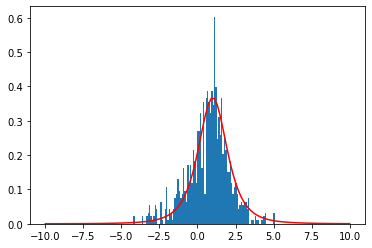

In [17]:
a=0.01
simulator = MCMC(nu,mu,sigma,a)
results, ar_001 = simulator.run(n,x)

plt.hist(results, density=True, bins=100)
plt.plot()
dom = np.linspace(-10,10,100)
plt.plot(dom, simulator.pi_dist(dom), 'r')

In [18]:
mu_001 = np.mean(results)
sigma_001 = np.std(results)
print('avg = {}, std = {}$'.format(mu_001, sigma_001))
print('avg_difference = {}, std_difference = {}$'.format(mu - mu_001, sigma - sigma_001))
print('acceptance_rate = {}'.format(ar_001))

avg = 0.704291811526884, std = 1.3842693534447847$
avg_difference = 0.295708188473116, std_difference = -0.38426935344478474$
acceptance_rate = 0.646


For $\alpha=0.1$ we have

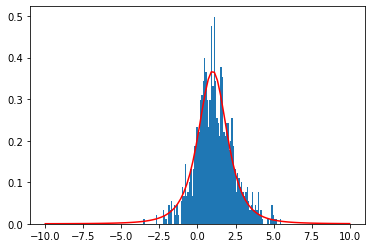

In [19]:
a=0.1
simulator = MCMC(nu,mu,sigma,a)
results, ar_01 = simulator.run(n,x)

plt.hist(results, density=True, bins=100)
plt.plot()
dom = np.linspace(-10,10,100)
plt.plot(dom, simulator.pi_dist(dom), 'r')

In [20]:
mu_01 = np.mean(results)
sigma_01 = np.std(results)
print('avg = {}, std = {}$'.format(mu_01, sigma_01))
print('avg_difference = {}, std_difference = {}$'.format(mu - mu_01, sigma - sigma_01))
print('acceptance_rate = {}'.format(ar_01))

avg = 1.1260098590409244, std = 1.2764878640099095$
avg_difference = -0.12600985904092443, std_difference = -0.27648786400990955$
acceptance_rate = 0.684


For $\alpha=1$ we have

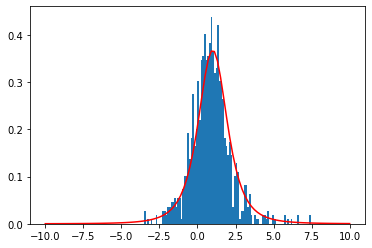

In [21]:
a=1
simulator = MCMC(nu,mu,sigma,a)
results, ar_1 = simulator.run(n,x)

plt.hist(results, density=True, bins=100)
plt.plot()
dom = np.linspace(-10,10,100)
plt.plot(dom, simulator.pi_dist(dom), 'r')

In [22]:
mu_1 = np.mean(results)
sigma_1 = np.std(results)
print('avg = {}, std = {}$'.format(mu_1, sigma_1))
print('avg_difference = {}, std_difference = {}$'.format(mu - mu_1, sigma - sigma_1))
print('acceptance_rate = {}'.format(ar_1))

avg = 0.8704706110260677, std = 1.3116106454063678$
avg_difference = 0.1295293889739323, std_difference = -0.31161064540636785$
acceptance_rate = 0.647


For $\alpha=10$ we have

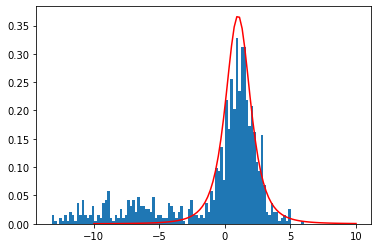

In [23]:
a=10
simulator = MCMC(nu,mu,sigma,a)
results, ar_10 = simulator.run(n,x)

plt.hist(results, density=True, bins=100)
plt.plot()
dom = np.linspace(-10,10,100)
plt.plot(dom, simulator.pi_dist(dom), 'r')

In [24]:
mu_10 = np.mean(results)
sigma_10 = np.std(results)
print('avg = {}, std = {}$'.format(mu_10, sigma_10))
print('avg_difference = {}, std_difference = {}$'.format(mu - mu_10, sigma - sigma_10))
print('acceptance_rate = {}'.format(ar_10))

avg = -0.7614601812546741, std = 3.9654065940993872$
avg_difference = 1.761460181254674, std_difference = -2.9654065940993872$
acceptance_rate = 0.703


In [25]:
mus = np.array([mu_001, mu_01, mu_1, mu_10])
sigmas = np.array([sigma_001, sigma_01, sigma_1, sigma_10])

In [26]:
min(abs(mus))

0.704291811526884

In [27]:
min(abs(sigmas))

1.2764878640099095

If we compare visually, the graphs that cover most of the parts of the curve will be the values that explore better curve, but I also notice after running the simulation several times the choice of the graph that better explores the curve does not seem so easy to see, and this happens even by comparing to the values of the mean and the standard deviation, at least with increments in the choice of the interval on the uniform distribution on the simulation function (which is commentend on the code) so I will say that up to this point, the choice of which graph will be a better solution to the exploration, depends on the parameters and the 'proposition distribuition', but for the set of parameters chosen $\alpha = 10$ seems to have explored better the curve.

Now, we will check the values of the acceptance fractions:

In [30]:
ac_rates = [ar_001, ar_01, ar_1, ar_10]
ac_rates

[0.646, 0.684, 0.647, 0.703]

We can see here that the acceptance rate was greater as the jump size was increased, but does a higher acceptance rate means efficient exploration distribuition?

I will say that it is, we are computing a ratio of the number of estimations that change from one state to another on the (subjacent) Markov Chain, against how many estimations we computed, it is the same principle behind Monte Carlo integration.Besides, even by assuming that de difference in computational time between each iteration is not significant, we can be sure that more estimations will mean more time, which will be a good measure of how well the curve was explored in terms of performance and result. 